## Evaluation of Manipulation experiments

In [1]:
import os
import re
import numpy as np
import signal_logger
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

import ipywidgets as widgets 
from IPython.display import display

from path_extender import *
from utilities import *

%matplotlib notebook

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] =  'serif'
plt.rcParams['font.serif'] = ['Times']
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [3.5, 2.625] #[2.3, 1.5]
plt.rcParams['figure.dpi'] = 600
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.05
plt.rcParams['axes.grid'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}'

In [2]:
# to get plots of zbf comparison with alpha = 1000 and alpha = 1:
# ROOT_DIR = "/media/giuseppe/My Passport/Work/logs_mppi/passivity_zbf_comparison/"

# to get plots of passivity comparison (alpha = 1000) filter_in_out vs no_filter:
#ROOT_DIR = "/media/giuseppe/My Passport/Work/logs_mppi/with_without_passivity_object_stuck/"

# to get plots of all methods comparisons:
ROOT_DIR = "/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/"

# to get plots of obstacle_avoidance_test:
#ROOT_DIR = "/media/giuseppe/My Passport/Work/logs_mppi/obstacle_avoidance_test/"

LOG_PREFIX = ""
LOG_FILES = get_files(ROOT_DIR, LOG_PREFIX)
REQUIRED_FIELDS = [
    "log/sim_time", 
    "log/solver/rate",
    "log/solver/delay_steps",
    "log/solver/rollouts/min_cost",
    
    "log/opt_time",
    "log/simulation_step",
    "log/power_from_interaction",
    "log/stage_cost", 
    "log/torque_command",
    
    "log/external_torque",
    "log/ground_truth_external_torque",
    "log/external_wrench",
    "log/external_wrench_filtered",
    "log/position_desired",
    "log/position_measured",
    
    "log/velocity_command",
    "log/velocity_measured",
    "log/velocity_mppi",
    
    "log/cartesian_limits_violation", 
    "log/joint_limits_violation",
    "log/tank_state", 
    "log/power_channels",
    "log/state"
]
data = get_data(ROOT_DIR, REQUIRED_FIELDS, log_prefix=LOG_PREFIX)
data = process_data(data, final_time=90)
data = pd.DataFrame.from_dict(data)


    Root dir: 
    /media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/
    Prefix: 
    
    Log files: 
    /media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_door.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_door_filter_in.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_door_filter_in_out.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_door_filter_out.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_drawer.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_drawer_filter_in.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_drawer_filter_in_out.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_interaction_method_analysis/a_drawer_filter_out.silo
/media/giuseppe/My Passport/Work/logs_mppi/objects_inter

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Removing prefix /log/ which is common to all signals
Logger contains the following keys (241):
[log/velocity_measured_0]
[log/velocity_measured_1]
[log/velocity_measured_2]
[log/velocity_measured_3]
[log/velocity_measured_4]
[log/velocity_measured_5]
[log/velocity_measured_6]
[log/velocity_measured_7]
[log/velocity_measured_8]
[log/velocity_measured_9]
[log/torque_command_0]
[log/torque_command_1]
[log/torque_command_2]
[log/torque_command_3]
[log/torque_command_4]
[log/torque_command_5]
[log/torque_command_6]
[log/velocity_mppi_0]
[log/velocity_mppi_1]
[log/velocity_mppi_2]
[log/velocity_mppi_3]
[log/velocity_mppi_4]
[log/velocity_mppi_5]
[log/velocity_mppi_6]
[log/velocity_mppi_7]
[log/velocity_mppi_8]
[log/velocity_mppi_9]
[log/velocity_mppi_10]
[log/state_0]
[log/state_1]
[log/state_2]
[log/state_3]
[log/state_4]
[log/state_5]
[log/state_6]
[log/state_7]
[log/state_8]
[log/state_9]
[log/state_10]
[log/state_11]
[log/state_12]
[log/state_13]
[log/state_14]
[log/state_15]
[log/state_

Processing a_door_filter_in
t start = 1.3039999999999672s, t end = 89.99900000006568s
Processing a_door_filter_in_out
t start = 1.3209999999999653s, t end = 89.98600000006562s
Processing a_door_filter_out
t start = 1.431999999999953s, t end = 89.99200000006564s
Processing a_drawer
t start = 1.4109999999999554s, t end = 89.98600000006562s
Processing a_drawer_filter_in
t start = 1.5089999999999446s, t end = 89.99400000006565s
Processing a_drawer_filter_in_out
t start = 1.314999999999966s, t end = 89.99500000006566s
Processing a_drawer_filter_out
t start = 1.2539999999999727s, t end = 89.99400000006565s
Processing a_microwave
t start = 1.1529999999999838s, t end = 89.99800000006567s
Processing a_microwave_filter_in
t start = 1.2269999999999757s, t end = 89.99700000006567s
Processing a_microwave_filter_in_out
t start = 1.5949999999999351s, t end = 89.99000000006563s
Processing a_microwave_filter_out
t start = 1.222999999999976s, t end = 89.99300000006565s
Processing a_shelf
t start = 1.141

Processing f_shelf
t start = 1.1579999999999833s, t end = 89.98800000006563s
Processing f_shelf_filter_in
t start = 1.2729999999999706s, t end = 89.99800000006567s
Processing f_shelf_filter_in_out
t start = 1.342999999999963s, t end = 89.99300000006565s
Processing g_door
t start = 1.1369999999999856s, t end = 89.99700000006567s
Processing g_door_filter_in
t start = 1.1989999999999787s, t end = 89.99900000006568s
Processing g_door_filter_in_out
t start = 1.3469999999999624s, t end = 89.99700000006567s
Processing g_door_filter_out
t start = 1.2489999999999732s, t end = 89.98900000006563s
Processing g_drawer
t start = 1.322999999999965s, t end = 89.98800000006563s
Processing g_drawer_filter_in
t start = 1.2839999999999694s, t end = 89.99400000006565s
Processing g_drawer_filter_in_out
t start = 1.5359999999999416s, t end = 89.99100000006564s
Processing g_drawer_filter_out
t start = 1.18799999999998s, t end = 89.98800000006563s
Processing g_microwave
t start = 1.4919999999999465s, t end = 8

Processing h_drawer_filter_out
t start = 1.2919999999999685s, t end = 89.98700000006562s
Processing h_microwave
t start = 1.7299999999999203s, t end = 89.99000000006563s
Processing h_microwave_filter_in
t start = 1.3259999999999648s, t end = 89.99100000006564s
Processing h_microwave_filter_in_out
t start = 1.5219999999999432s, t end = 89.99200000006564s
Processing h_microwave_filter_out
t start = 1.3219999999999652s, t end = 89.98700000006562s
Processing h_shelf
t start = 1.1269999999999867s, t end = 89.98700000006562s
Processing h_shelf_filter_in
t start = 1.313999999999966s, t end = 89.99400000006565s
Processing h_shelf_filter_in_out
t start = 1.2669999999999713s, t end = 89.99200000006564s
Processing i_door
t start = 1.115999999999988s, t end = 89.99100000006564s
Processing i_door_filter_in
t start = 1.3629999999999607s, t end = 89.99800000006567s
Processing i_door_filter_in_out
t start = 1.3289999999999644s, t end = 89.99400000006565s
Processing i_door_filter_out
t start = 1.366999

<a id='index'></a>

### Index
- [Methods evaluation](#methods_evaluation)
- [Power cost analysis](#power_cost_analysis)
- [Energy tank comparison](#energy_tank_comparison)
- [Passivity coefficient analysis](#passivity_coefficient_analysis)
- [Experiment plots](#experiment_plots)
- [Obstacle avoidance test](#obstacle_avoidance_test)

In [3]:
DO_METHOD_EVALUATION = True
DO_EXPERIMENT_PLOTS = False
DO_POWER_COST_ANALYSIS = False
DO_PASSIVITY_COEFFICIENT_ANALYSIS = False 
DO_ENERGY_TANK_COMPARISON = False
DO_OBSTACLE_AVOIDANCE_TEST = False

<a id='methods_evaluation'></a>

## Method evaluation 
[index](#index)

### Stage cost

<IPython.core.display.Javascript object>


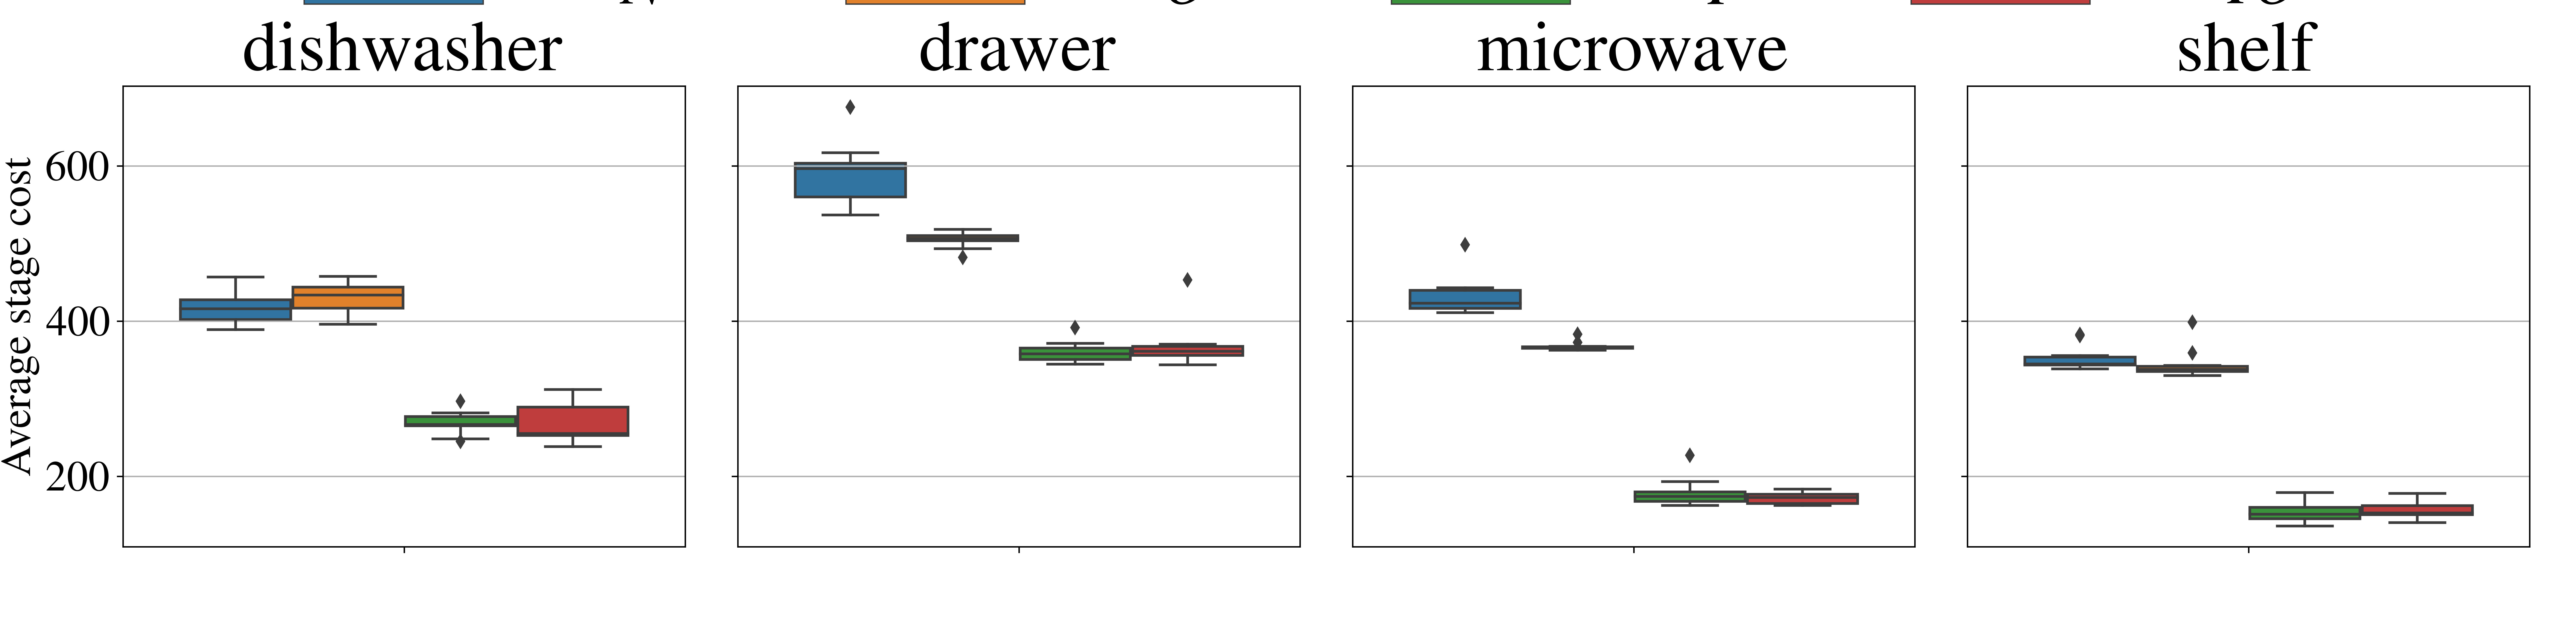

Button(description='Save Figure', style=ButtonStyle())

In [4]:
if DO_METHOD_EVALUATION:
    order = [r'$\Pi_{N}$', r'$\Pi_{O}$', r'$\Pi_{I}$', r'$\Pi_{IO}$']
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.size'] = 24
    data_renamed = data.rename(columns={"average_stage_cost": "average stage cost", 
                                        "experiment_type": "experiment type",
                                        "joint_limits_violation_se": "joint limits violation se",
                                        "cartesian_limits_violation_se": "cartesian limits violation se",
                                        "dissipated_power": "dissipated power",
                                        "object_type": "object type"})
   
    g =sns.catplot(x="x", y="average stage cost", hue="experiment type", col="object type", 
                   hue_order=order, data=data_renamed, kind="box", legend=False)

    (g.set_axis_labels("", r'Average stage cost')
      .set_xticklabels([])
      .set_titles(r'{col_name}', fontsize=40)
      .despine(right=False, top=False))

    for i, (col_val, ax) in enumerate(g.axes_dict.items()):
        if i == 0:
            ax.legend(loc='upper center', bbox_to_anchor=(2.1, 1.5), ncol=4, fontsize=50)
        ax.set_title(col_val, fontsize=40)
    display_save_button(g.fig)
    plt.savefig("evaluation_stage_cost.pdf", format='pdf') 

### Joint limits
We compute the cumulative violation summed over all joints

In [5]:
if DO_METHOD_EVALUATION:
    pass
#     g =sns.catplot(x="x", y="joint limits violation se", hue="experiment type", col="object type", 
#                    hue_order=order,data=data_renamed, kind="box", legend=False);


#     plt.rcParams['text.usetex'] = True
#     (g.set_axis_labels("", r'Joint limits violation')
#       .set_xticklabels([])
#       .set_titles(r'{col_name}')
#       .despine(right=False, top=False))

#     for i, (col_val, ax) in enumerate(g.axes_dict.items()):
#         ax.set_title("")
    
#     display_save_button(g.fig)
#     plt.savefig("evaluation_joint_limits_violation.pdf", format='pdf') 
    
# statistics
max_violations = []
for violation in data["joint_limits_violation"]:
    max_violations.append(np.max(violation, axis=0))
max_violations = np.asarray(max_violations)
print(f"max violations: {np.max(max_violations, axis=0)}")

max violations: [1.01687896 1.01644578 0.         0.01230156 0.01227988 0.01089716
 0.06042137 0.17053043 0.         0.        ]


### Cartesian limits
We compute the cumulative squared violation of cartesian limits (self collision)

In [6]:
if DO_METHOD_EVALUATION:
    pass
#     g =sns.catplot(x="x", y="cartesian limits violation se", hue="experiment type", col="object type", 
#                    hue_order=order, data=data_renamed, kind="box", legend=False);

#     g.set_axis_labels("", r'Self collision violation')
#     g.set_xticklabels([""])
#     #g.set_titles(r'{col_name}')
#     g.despine(right=False, top=False)
#     for _, ax in g.axes_dict.items():
#         ax.set_ylim([0.0, 0.2])

#     for i, (col_val, ax) in enumerate(g.axes_dict.items()):
#         ax.set_title("")
#     display_save_button(g.fig)
#     plt.savefig("evaluation_cartesian_limits_violation.pdf", format='pdf')

# statistics
max_violations = []
for violation in data["cartesian_limits_violation"]:
    max_violations.append(np.max(violation, axis=0))
max_violations = np.asarray(max_violations)
print(f"max violations: {np.max(max_violations, axis=0)}")

max violations: [0.0289656  0.         0.03204521]


### Dissipated power
We analyse the effect of the energy tank indirectly thorugh a minimized applied wrench

<IPython.core.display.Javascript object>


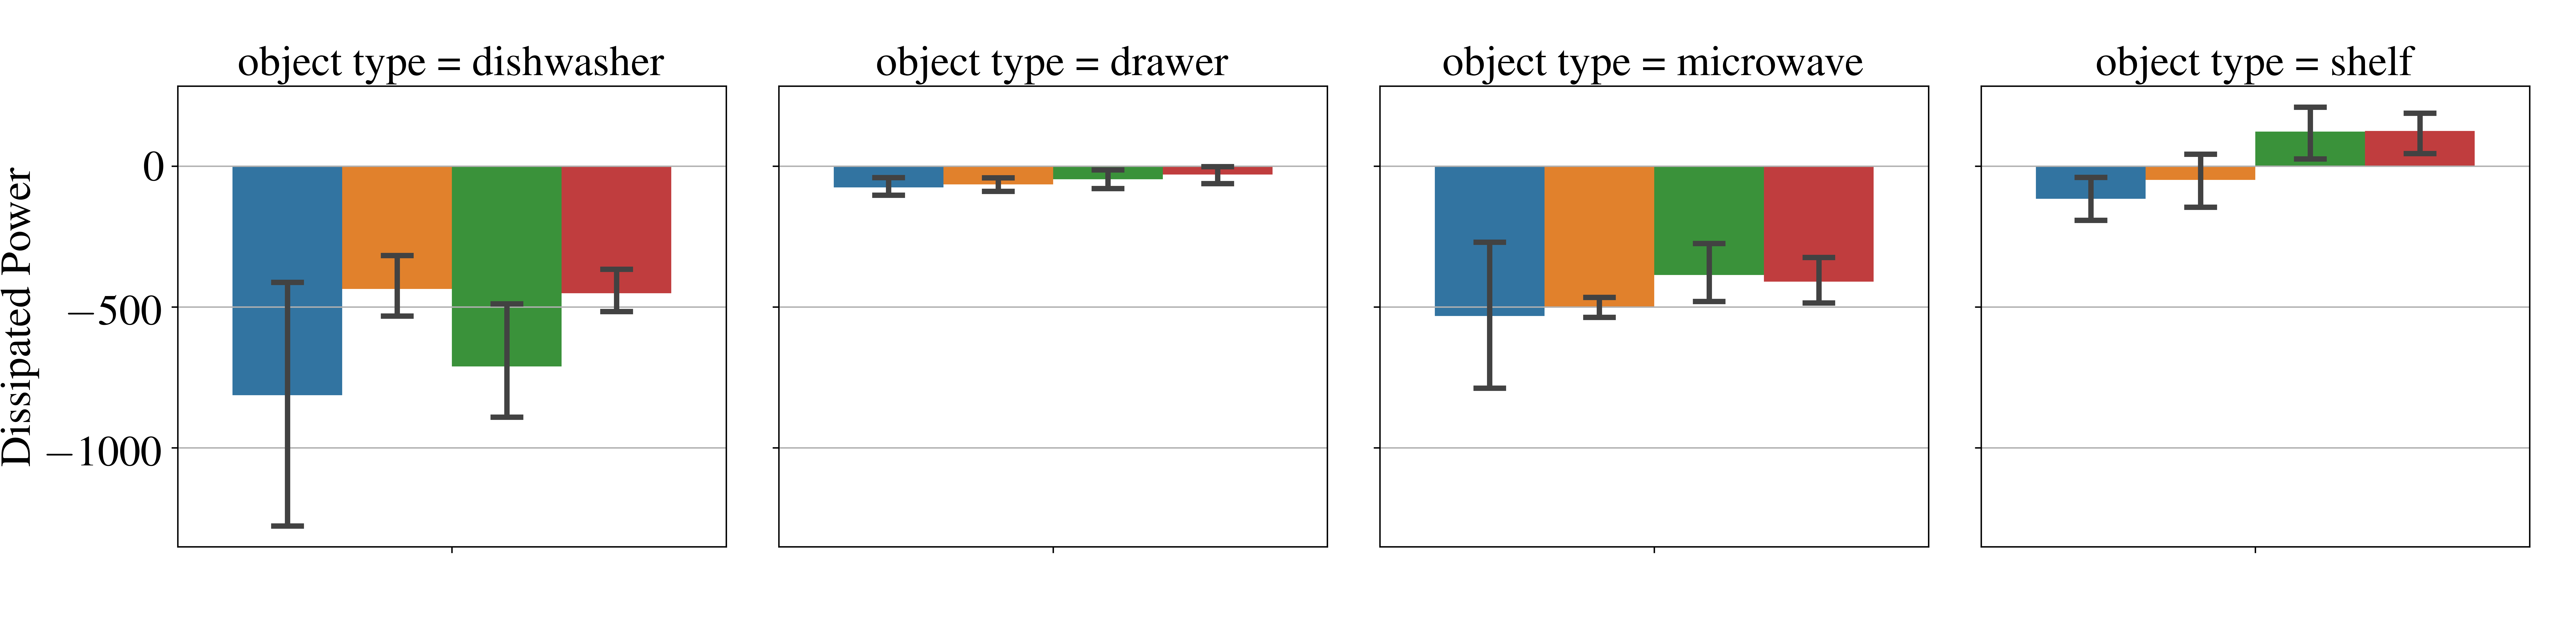

Button(description='Save Figure', style=ButtonStyle())

In [7]:
if DO_METHOD_EVALUATION:
    g =sns.catplot(x="x", y="dissipated power", hue="experiment type", col="object type", 
                   hue_order=order, data=data_renamed, kind="bar",  capsize=.05, errwidth=3, 
                   legend=False);

    g.set_axis_labels("", r'Dissipated Power')
    g.set_xticklabels([""])
    #g.set_titles(r"{col_name}")
    g.despine(right=False, top=False)

    display_save_button(g.fig)
    plt.savefig("evaluation_dissipated_power.pdf", format='pdf')

<a id='power_cost_analysis'></a>

## Power vs No-Power cost
[index](#index)

We compare experiments where we do/dont penalize the power exchanged with the environment

In [8]:
if DO_POWER_COST_ANALYSIS:
    # concatenate all values for each experiment
    all_wrench_data = {
        'power cost': [], 
        'object_type': [], 
        'wrench_norm': [], 
        'power': []
    }

    for power_cost, object_type, wrench, power in zip(data['power_cost'], 
                                                      data['object_type'], 
                                                      data['wrench_norm'], 
                                                      data['power_from_interaction']):
        # threshold wrench
        wrench_thresholded = wrench[wrench > 1]
        all_wrench_data['power cost'].extend(["On" if power_cost else "Off"] * len(wrench_thresholded))
        all_wrench_data['object_type'].extend([object_type] * len(wrench_thresholded))
        all_wrench_data['wrench_norm'].extend(wrench_thresholded)
        all_wrench_data['power'].extend(power[wrench>1])

    all_wrench_df = pd.DataFrame.from_dict(all_wrench_data)

    fig, ax = plt.subplots(2, 1)
    sns.barplot(x='object_type', y="power", hue="power cost", data=all_wrench_df, ax=ax[0],
                hue_order=["Off", "On"], lw=1.5,  capsize=.05, errwidth=2, edgecolor=".2",)

    sns.barplot(x='object_type', y="wrench_norm", hue="power cost", data=all_wrench_df, ax=ax[1],
                hue_order=["Off", "On"], lw=1.5,  capsize=.05, errwidth=2, edgecolor=".2",)

    ax[0].set_xlabel("")
    ax[0].set_ylabel("Power [W]",fontsize=18)
    ax[0].set_xticks([])
    ax[0].set_ylim([-25, 2])
    ax[0].tick_params(labelsize=15)

    ax[1].set_xlabel("")
    ax[1].set_ylabel("Wrench [N]",fontsize=18)
    ax[1].tick_params(labelsize=15)
    ax[1].legend().set_visible(False)


    display_save_button(fig)

<a id='energy_tank_comparison'></a>

## Wrench and energy tank
[index](#index)

In [9]:
if DO_ENERGY_TANK_COMPARISON:
    # we need to align time across all the experiments 
    from scipy.interpolate import interp1d

    # find common min and max time as well as best approx for first fix and release time for the object
    t_min = 0
    t_max = np.inf
    t_min_fix = np.inf
    t_max_rel = 0
    TOLL = 1
    for t, s in zip(data['sim_time'], data['state']):
        if t[0] > t_min:
            t_min = t[0]
        if t[-1] < t_max:
            t_max = t[-1]

        # find where the object is released
        object_positions = s[:, 24]
        object_fix = np.where(object_positions > np.pi * (30 - TOLL) / 180)[0][0]
        object_release = np.where(object_positions > np.pi * (30 + TOLL) / 180)[0][0]

        fix_time = t[object_fix]
        release_time = t[object_release]
        if fix_time < t_min_fix:
            t_min_fix = fix_time
        if release_time > t_max_rel:
            t_max_rel = release_time

    global_time = np.arange(t_min, t_max, step=0.01)


    # concatenate data for each experiment in a single dictionary
    data_extended = {
        'time': [], 
        'wrench_norm': [], 
        'experiment_type': [], 
        'tank_energy': []
    }

    for t, w, e, p in zip(data['sim_time'], data['wrench_norm'], 
                          data['experiment_type'], data['power_from_interaction']):
        f = interp1d(t, w, kind='nearest')
        w = f(global_time)
        data_extended['time'].extend(global_time)
        data_extended['wrench_norm'].extend(w)
        data_extended['experiment_type'].extend([e] * len(global_time))

        # we know that 10 is the initial energy value and we collect a sample each 15 steps of 1ms each
        ft = interp1d(t, 10 + np.cumsum(p)*0.015)
        s = ft(global_time)
        data_extended['tank_energy'].extend(s)

    data_extended = pd.DataFrame.from_dict(data_extended)

    fig, ax = plt.subplots()
    sns.lineplot(x='time', y='wrench_norm', hue="experiment_type", estimator='median', 
                 data=data_extended, ci='sd')

    fix_window = np.logical_and(global_time>t_min_fix, global_time<t_max_rel)
    ax.fill_between(global_time, 0, 1, where=fix_window, facecolor='red', alpha=0.1, transform=ax.get_xaxis_transform(), 
                    label="fix")
    ax.legend(frameon=True)
    ax.set_xlim(5, 40)     
    ax.set_xlabel("time [s]")
    ax.set_ylabel("wrench norm [N]")

    display_save_button(fig)
    plt.savefig("wrench_norm_manipulation.pdf", format='pdf')


    fig, ax = plt.subplots()
    rect = [0.6,0.4,0.48,0.48]
    ax.set_xlim(5, 40)
    ax.set_ylim(-400, 20)
    sns.lineplot(x='time', y='tank_energy', hue="experiment_type", estimator='mean', data=data_extended, 
                 ci='sd')
    ax.set_xlabel("time [s]")
    ax.set_ylabel("energy [J]")
    ax.legend(frameon=True, loc="lower left")

    ax_sub = add_subplot_axes(ax,rect)
    ax_sub.set_xlim(15, 40)
    ax_sub.set_ylim(-1, 11)
    sns.lineplot(x='time', y='tank_energy', hue="experiment_type", estimator='mean', data=data_extended, 
                 ci='sd', ax=ax_sub, legend=False)
    ax_sub.axhline(y=2, xmin=0, xmax=1, ls="--", c='r', label="min energy")
    ax_sub.legend(frameon=True)
    ax_sub.set_xlabel("")
    ax_sub.set_ylabel("")
    
    from matplotlib.patches import ConnectionPatch
    kw = dict(linestyle="--", color="gray")
    cp1 = ConnectionPatch(((16-5.)/(40-5), (10 + 400.)/(20+400)), (0, 1), "axes fraction", "axes fraction",
                      axesA=ax, axesB=ax_sub, **kw)
    cp2 = ConnectionPatch((1, (5 + 400.)/(20+400)), (1, 1), "axes fraction", "axes fraction",
                      axesA=ax, axesB=ax_sub, **kw)
    ax.add_artist(cp1)
    ax.add_artist(cp2)
    
    display_save_button(fig)
    plt.savefig("energy_manipulation.pdf", format='pdf')

<a id='passivity_coefficient_analysis'></a>

### Comparison energy tank with different alpha
[index](#index)

In [10]:
if DO_PASSIVITY_COEFFICIENT_ANALYSIS:
    fig, ax = plt.subplots()
    ax.set_xlim(0, 40)
    ax.set_ylim(-1, 15)
    sns.lineplot(x='time', y='tank_energy', hue="experiment_type", estimator='mean', data=data_extended, 
                 ci='sd')
    ax.axhline(y=2, xmin=0, xmax=1, ls="--", c='r')
    
    
    # Add a separate legend for the min energy
    leg2 = ax.legend([ax.get_lines()[-1]],[r'min energy'], loc='upper right', frameon=True)
    ax.add_artist(leg2)

    ax.legend()
    ax.grid(True)
    ax.set_xlabel("time [s]")
    ax.set_ylabel("energy [J]")
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
    plt.savefig("passivity_coefficient_comparison.pdf", format='pdf')
    display_save_button(fig)

<a id='experiment_plots'></a>

## Experiment plots
[index](#index)

Here we plot different signal for a singal experiment

In [11]:
exp_idx = 0    # choose the experiment

### Energy tank

In [12]:
if DO_EXPERIMENT_PLOTS:
    fig, ax  = plt.subplots()
    ax.plot(data['sim_time'][exp_idx], 0.5 * np.square(data['tank_state'][exp_idx]), label="tank_energy")
    ax.plot(data['sim_time'][exp_idx], 10 + np.cumsum(data['power_from_interaction'][exp_idx])*0.015, 
            label="power_from_interaction")
    
    MIN_ENERGY = 2
    ax.axhline(y=MIN_ENERGY, ls="--")
    ax.set_title("Energy tank")
    ax.legend()

### Torque measurements

In [13]:
if DO_EXPERIMENT_PLOTS:
    ax = matrix_plot(data['sim_time'][exp_idx], 
                     data['external_torque'][exp_idx], 
                     prefix="external_torque")
    ax.set_title("External measured torque")
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

    ax = matrix_plot(data['sim_time'][exp_idx], 
                     data['ground_truth_external_torque'][exp_idx], 
                     prefix="gt_external_torque")
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

    # Compare estimated against ground truth
    uidx = 0
    fig, ax2 = plt.subplots()
    ax2.plot(data['sim_time'][exp_idx], data['external_torque'][exp_idx][:, uidx], label=f"est_{uidx}")
    ax2.plot(data['sim_time'][exp_idx], data['ground_truth_external_torque'][exp_idx][:, uidx], '--', 
             label=f"gt_{uidx}")
    ax2.legend()

### Stage cost

In [14]:
if DO_EXPERIMENT_PLOTS:
    ax = scalar_plot(data['sim_time'][exp_idx], data['stage_cost'][exp_idx], prefix="stage_cost")
    ax.set_title("stage_cost")

### Min cost

In [15]:
if DO_EXPERIMENT_PLOTS:
    ax = scalar_plot(data['sim_time'][exp_idx], data['min_cost'][exp_idx], prefix="min_cost")
    ax.set_title("Minimum rollout cost")

### Position desired

In [16]:
if DO_EXPERIMENT_PLOTS:
    ax = matrix_plot(data['sim_time'][exp_idx], data['position_desired'][exp_idx], prefix="des")
    ax = matrix_plot(data['sim_time'][exp_idx], data['position_measured'][exp_idx], prefix="meas", 
                     linestyle="--", axis=ax)
    ax.legend(fontsize=10)

    # Compare only one channel
    uidx = 2
    fig2, ax2 = plt.subplots()
    ax2.plot(data['sim_time'][exp_idx], data['position_desired'][exp_idx][:, uidx], label=f"desired_{uidx}")
    ax2.plot(data['sim_time'][exp_idx], data['position_measured'][exp_idx][:, uidx], '--', label=f"measured_{uidx}")
    ax2.legend()

### Velocity measured

In [17]:
if DO_EXPERIMENT_PLOTS:
    ax = matrix_plot(data['sim_time'][exp_idx], data['velocity_measured'][exp_idx], prefix="velocity_measured")
    ax.set_title("Velocity measured")

### Velocity command

In [18]:
if DO_EXPERIMENT_PLOTS:
    cmd_idx = 6
    ax = scalar_plot(data['sim_time'][exp_idx], data['velocity_mppi'][exp_idx][:,cmd_idx], 
                     prefix=f"before_filter_{cmd_idx}")
    ax = scalar_plot(data['sim_time'][exp_idx], data['velocity_command'][exp_idx][:,cmd_idx], 
                    prefix=f"after_filter_{cmd_idx}", axis=ax)
    ax.set_title("Velocity command")

### Torque command

In [19]:
if DO_EXPERIMENT_PLOTS:
    ax = matrix_plot(data['sim_time'][exp_idx], data['torque_command'][exp_idx], prefix="torque_command")
    ax.set_title("Torque command")

### Joint limits violation

In [20]:
if DO_EXPERIMENT_PLOTS:
    ax = matrix_plot(data['sim_time'][exp_idx], data['joint_limits_violation'][exp_idx], 
                 prefix="joint_limits_violation")
    ax.set_title("Joint limits violation")

### Cartesian limits violation

In [21]:
if DO_EXPERIMENT_PLOTS:
    ax = matrix_plot(data['sim_time'][exp_idx], data['cartesian_limits_violation'][exp_idx], 
            prefix="cartesian_limits_violation")
    ax.set_title("Cartesian limits violation")

### Computation Performance Metrics

In [22]:
if DO_EXPERIMENT_PLOTS:
    #ax = scalar_plot(data['sim_time'][exp_idx], data['delay_steps'][exp_idx], prefix="delay_steps")
    #ax.set_title("delay steps")
    ax = scalar_plot(data['sim_time'][exp_idx], 1.0/data['rate'][exp_idx], prefix="rate")
    
    fig, ax = plt.subplots()
    contact_state_idx = 26
    contact_mask = data['state'][exp_idx][:, contact_state_idx] > 0.0
    sim_step = data['simulation_step'][exp_idx][contact_mask]
    ax.plot(data['state'][exp_idx][:, contact_state_idx] , label="contact flag")
    ax.plot(data['simulation_step'][exp_idx] * 1000 , label="simulation_step")

    # We compute these metrics only when in contact as this is where the difference between meshes plays 
    # a role
    print(f"Max: {1.0/np.min(sim_step)/1000}, Min: {1.0/np.max(sim_step)/1000} KHz, Mean: {1.0/np.mean(sim_step)/1000} KHz, Std: {1.0/np.std(sim_step)/1000} KHz")
    print(f"Average opt time: {np.mean(data['opt_time'][exp_idx]) * 1000 } ms")
    print("\n\nSingle")
    print("Max: 39.91856612510479, Min: 0.08300425604322863 KHz, Avg: 2.940748217192103 KHz, Std: 1.7962439317248262 KHz")
    print("Two realistic")
    print("Max: 41.94454930581771, Min: 0.04337963820514144 KHz, Avg: 2.1332271154104614 KHz, Std: 1.2765470097347171 KHz")
    print("Convex hull")
    print("Max: 32.96739524610161, Min: 0.04788936484000188 KHz, Avg: 0.9756731241637593 KHz, Std: 0.7493113313931056 KHz")

<a class="anchor" id="obstacle_avoidance_test"></a>

## Obstacle avoidance tests

In [23]:
from matplotlib.patches import ConnectionPatch

if DO_OBSTACLE_AVOIDANCE_TEST: 
    # Set the order in which the bars should be visualized
    order = [r'$\Pi_{N}$', r'$\Pi_{O}$', r'$\Pi_{I}$', r'$\Pi_{IO}$']
    
    # Manually set a color per bar, such that if we plot less bars, we keep a common coloring leged
    # (for example when we want to plot a zoomed subset of bars as here)
    palette_dict = {hue: sns.color_palette()[idx] for idx, hue in enumerate(order)}
    
    
    fig, ax  = plt.subplots()
    sns.barplot(x="x", y="cartesian_limits_violation_se", hue="experiment_type", 
                   hue_order=order, data=data, capsize=.05, palette=palette_dict, errwidth=1)
    
    
    subax = add_subplot_axes(ax, [0.45, 0.35, 0.5, 0.5])
    sns.barplot(x="x", y="cartesian_limits_violation_se", hue="experiment_type", 
                   hue_order=order[2:], data=data, capsize=.05, errwidth=1, palette=palette_dict, ax=subax)
    subax.set_xlabel("")
    subax.set_ylabel("")
    subax.set_xticks([])
    subax.tick_params()
    subax.get_legend().remove()
    
    kw = dict(linestyle="--", color="gray")
    cp1 = ConnectionPatch((.5, 0), (0, 0), "axes fraction", "axes fraction",
                      axesA=ax, axesB=subax, **kw)
    cp2 = ConnectionPatch((1.0, 0), (1.0, 0), "axes fraction", "axes fraction",
                      axesA=ax, axesB=subax, **kw)
    ax.add_artist(cp1)
    ax.add_artist(cp2)
    
    ax.set_xlabel("")
    ax.set_ylabel("Cartesian limits violation")
    ax.set_xticks([])
    ax.tick_params()
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, columnspacing=0.5)
    plt.savefig("obstacle_avoidance_test", format='pdf')
    display_save_button(fig)